# デモ1 (犬と猫の識別)

(参考) 
- Kerasのドキュメントページ : https://keras.io/ja
- Convolutional Neural Networkについて : http://qiita.com/icoxfog417/items/5fd55fad152231d706c2

## 1.ライブラリをインポートする（外部の機能を使う準備をする）

In [1]:
#ユーザが指定するべき部分のみコメント（灰色の文字）で示しています
!pip3 install tensorflow keras numpy matplotlib seaborn
#↑インストール
import sys
sys.path.append('./aitoolkit') 
from aitoolkit import ObjectDetector
from aitoolkit import plot_learning_history
%matplotlib inline
from IPython.display import Image

Using TensorFlow backend.


## 2. モデルの定義をする
- まずは自分で小規模なモデルを作ってみる

In [2]:
from keras.layers import Input, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
import warnings
warnings.filterwarnings('ignore')
#出てくるエラー（W0808とか）は無視してOK

detector = ObjectDetector(train_data_dir = './images/train/cat_or_dog/',validation_data_dir = './images/validation/cat_or_dog/',\
                          result_data_dir = 'results/cat_or_dog/')
input_tensor = Input(shape=(200, 200, 3))
x = Convolution2D(48, 11, strides=3, activation='relu', padding='same')(input_tensor)
x = MaxPooling2D(3, strides=2)(x)
x = BatchNormalization()(x)
x = Convolution2D(128, 5, strides=3, activation='relu', padding='same')(x)
x = MaxPooling2D(3, strides=2)(x)
x = BatchNormalization()(x)
x = Convolution2D(192, 3, strides=1, activation='relu', padding='same')(x)
x = Convolution2D(192, 3, strides=1, activation='relu', padding='same')(x)
x = Convolution2D(128, 3, strides=1, activation='relu', padding='same')(x)
x = MaxPooling2D(3, strides=2)(x)
x = BatchNormalization()(x)
conv_model = Model(input=input_tensor, output=x)

W0823 16:01:19.468965 4698314176 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 16:01:19.485141 4698314176 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 16:01:19.488867 4698314176 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 16:01:19.520714 4698314176 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0823 16:01:19.546906 4698314176 deprecation_wrapper.py:119] From /usr/loca

ラベル : 
['cat', 'dog']


## 3. データセットの定義をする
- batch_size 一度に何枚を学習に利用するか デフォルト 32
- is_augmenting データのオーグメンテーション（水増し）をするならTrue デフォルト:True

In [3]:
original_detector = ObjectDetector(train_data_dir = './images/train/cat_or_dog/',validation_data_dir = './images/validation/cat_or_dog/',\
                          result_data_dir = 'results/cat_or_dog/')
#↓ユーザはここを指定
original_detector.create_datasets(batch_size=16, is_augmenting=True)

ラベル : 
['cat', 'dog']
Found 1908 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## 4. 学習をする
- 匂配計算について : http://postd.cc/optimizing-gradient-descent/
- detector.create_model()について
    - どのようなアルゴリズムで学習するかを決める
    - sgd_lr : SGD（重みを更新するクラス）の学習率(範囲t：t>0.0)、デフォルト：0.01
    - sgd_momentum : SGDのモメンタム（パラメーターの一種）、デフォルト:0.1
    - original_model : 自分で定義したモデルを使う時、ここにmodelを代入する、デフォルト:None
    - batch_norm : Batch Normalizationを使うかどうか、デフォルト:True
    - dropout : Dropoutを使うかどうか、デフォルト:True
- detector.fit()について
    - 実際に学習を行う
    - samples_per_epoch : 1エポック中にどれくらいの数の画像を使うか、デフォルト：2000
    - nb_validation_samples : 1エポックの検証にどれくらいの数の画像を使うか、デフォルト：40
    - nb_epoch : 学習にどれくらいのエポックを回すか、デフォルト : 20
- 結果は自動的に出力される

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

Index 1
[0.39474544 0.6052546 ]
予測：　　dog


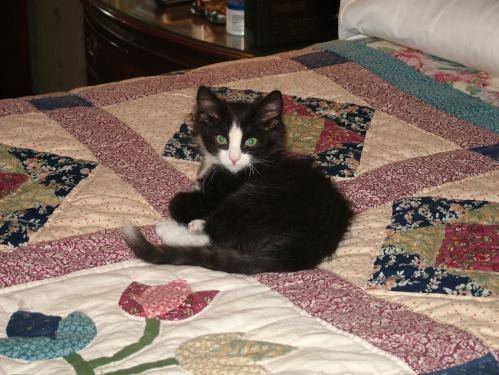

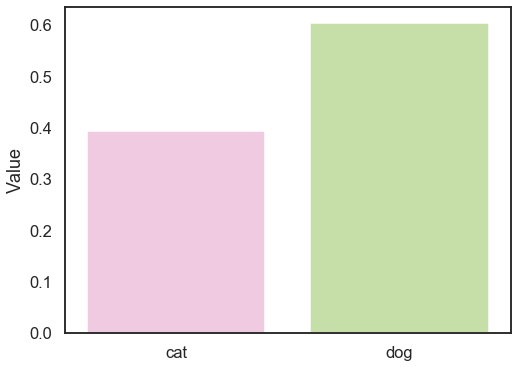


Index 2
[0.40405798 0.5959421 ]
予測：　　dog


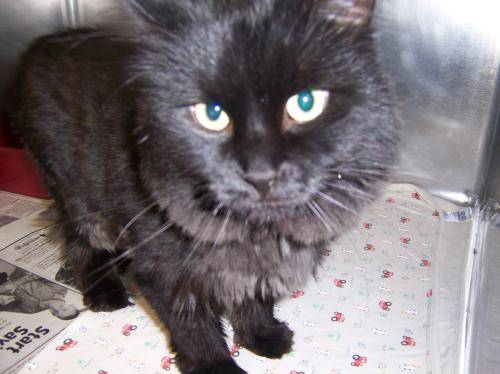

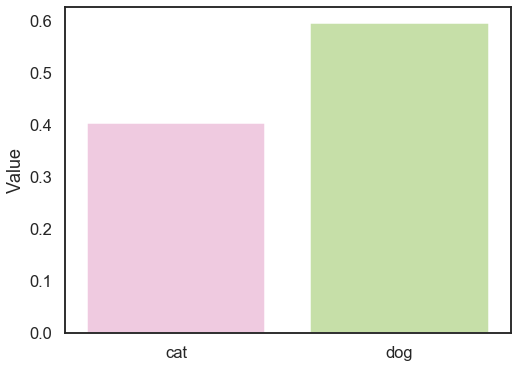


Index 3
[0.47318482 0.5268151 ]
予測：　　dog


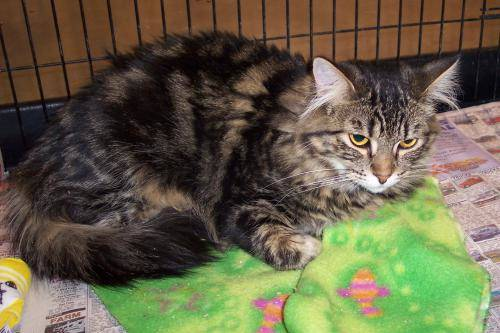

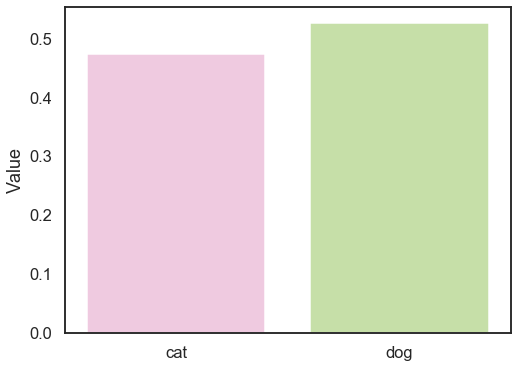


Index 4
[0.41880786 0.58119214]
予測：　　dog


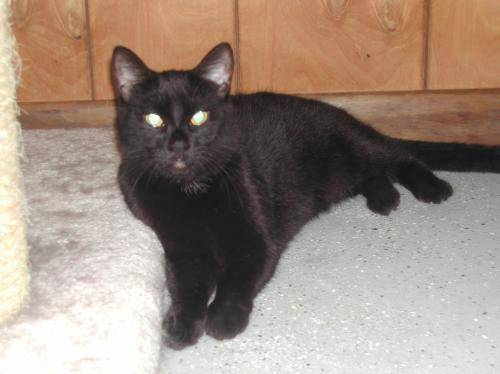

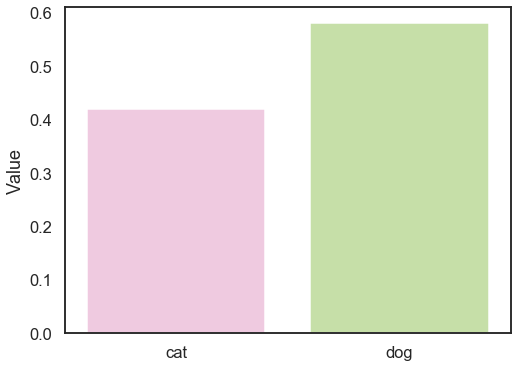


Index 5
[0.41416502 0.58583504]
予測：　　dog


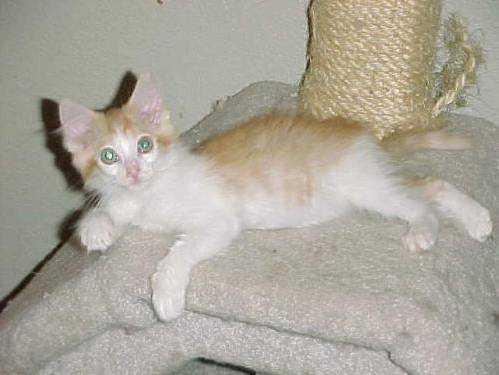

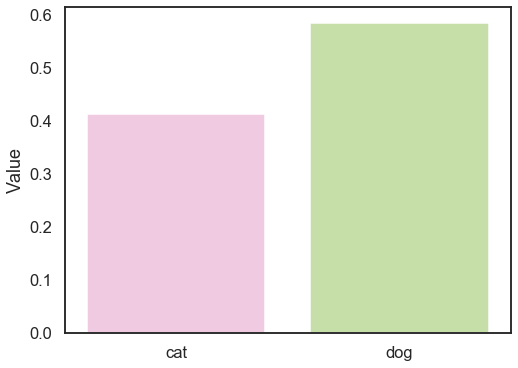


Index 6
[0.4207763 0.5792237]
予測：　　dog


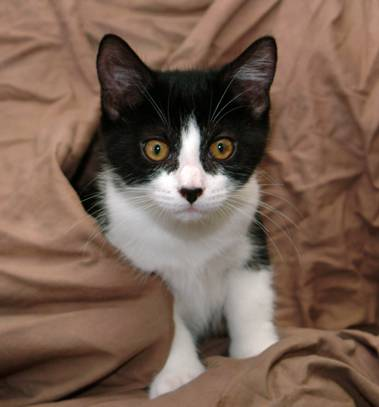

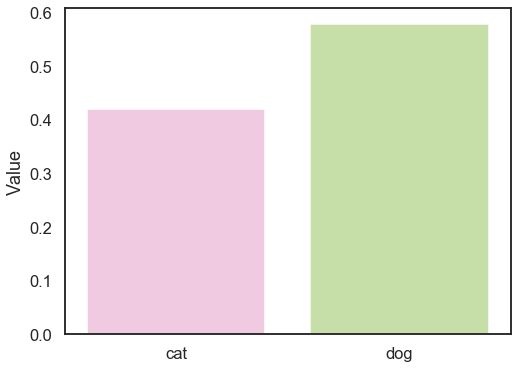


Index 7
[0.40704265 0.5929574 ]
予測：　　dog


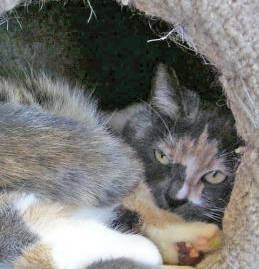

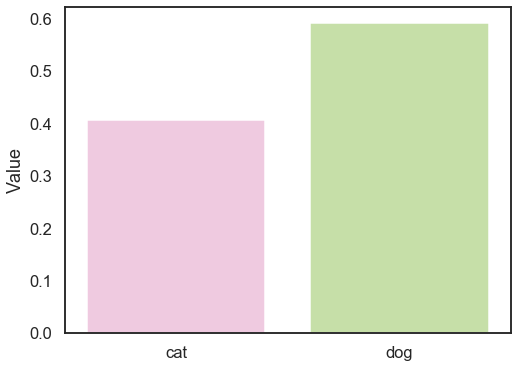


Index 8
[0.40782553 0.5921744 ]
予測：　　dog


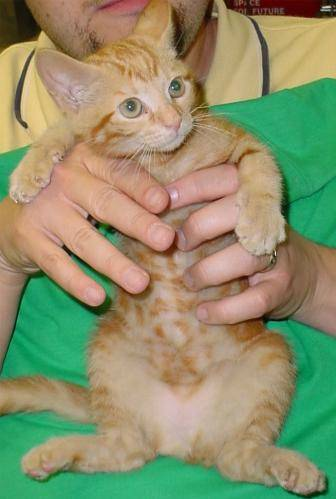

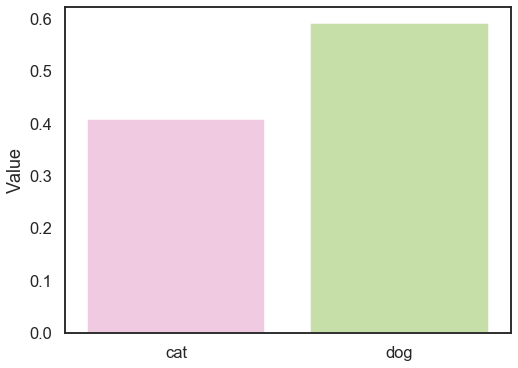


Index 9
[0.39236405 0.607636  ]
予測：　　dog


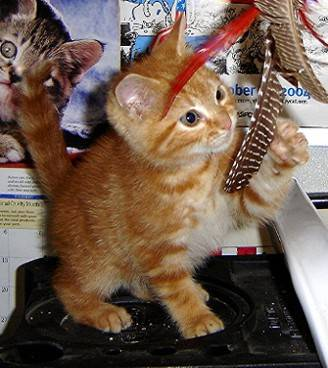

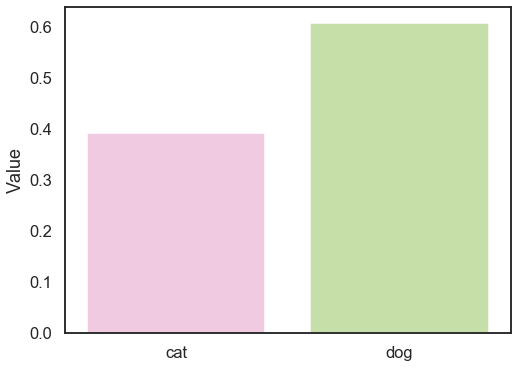


Index 10
[0.4124529  0.58754706]
予測：　　dog


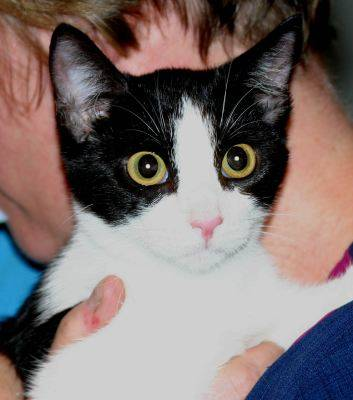

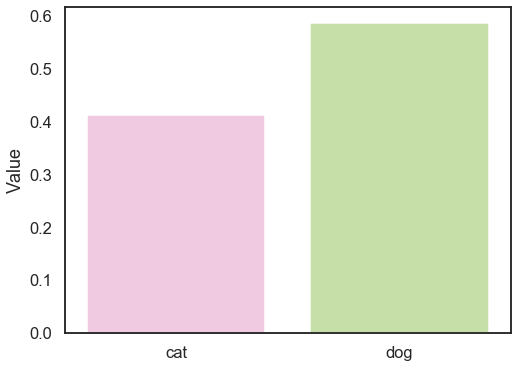


Index 11
[0.49844807 0.5015519 ]
予測：　　dog


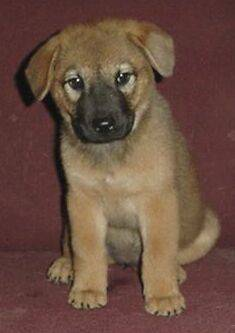

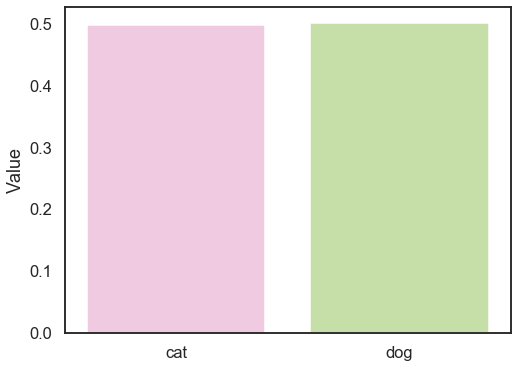


Index 12
[0.3856027 0.6143973]
予測：　　dog


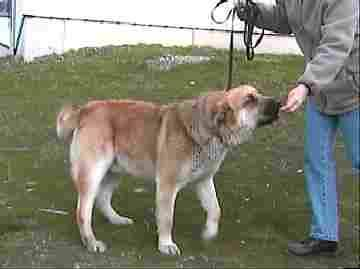

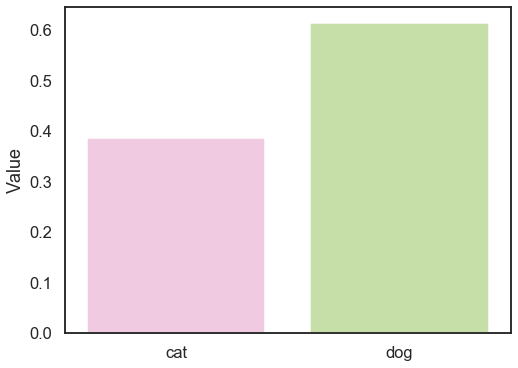


Index 13
[0.4875991  0.51240087]
予測：　　dog


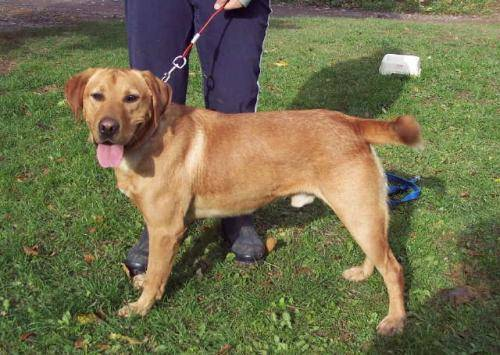

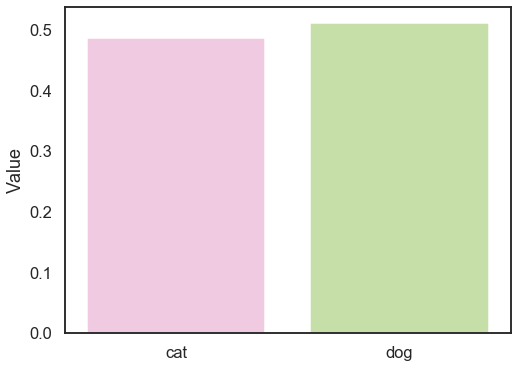


Index 14
[0.41011623 0.58988374]
予測：　　dog


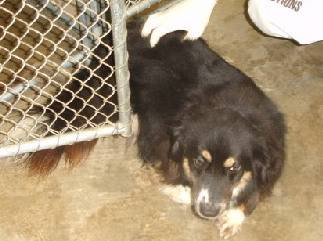

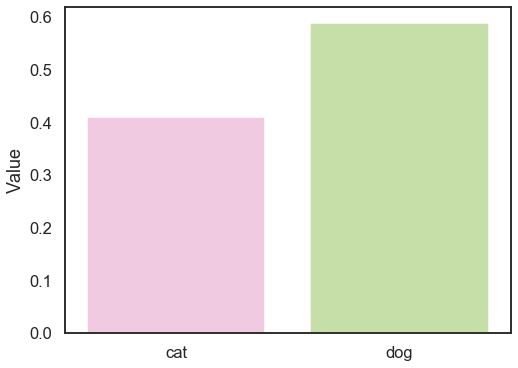


Index 15
[0.41289523 0.58710474]
予測：　　dog


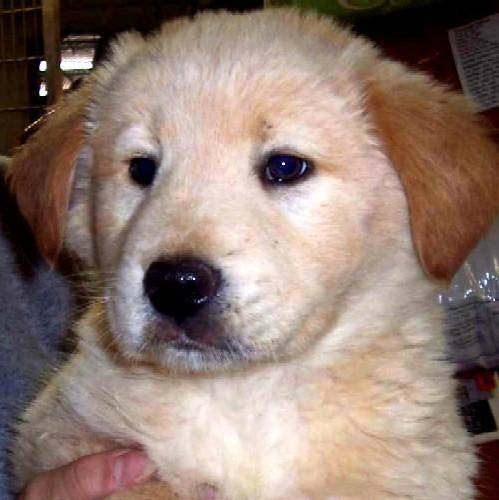

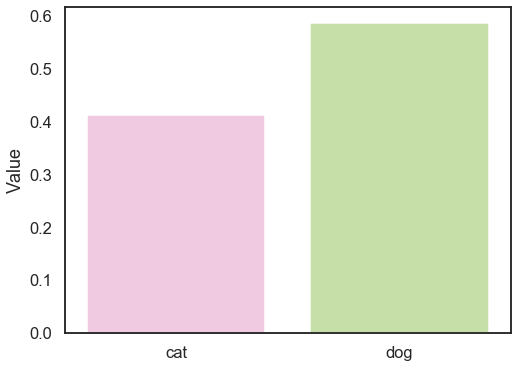


Index 16
[0.4029869  0.59701306]
予測：　　dog


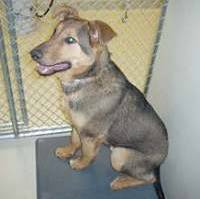

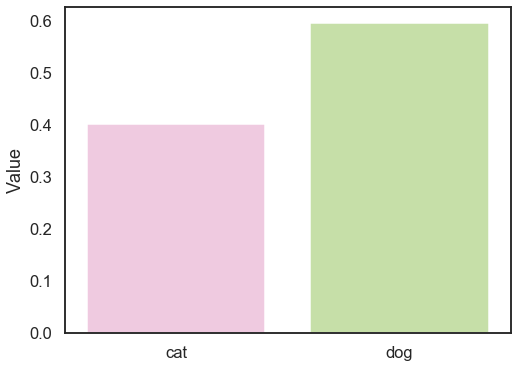


Index 17
[0.42860508 0.5713949 ]
予測：　　dog


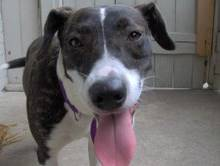

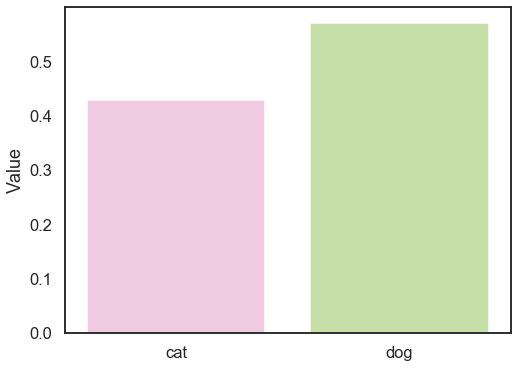


Index 18
[0.4040849 0.5959151]
予測：　　dog


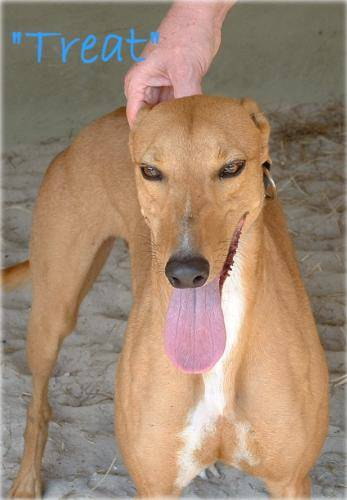

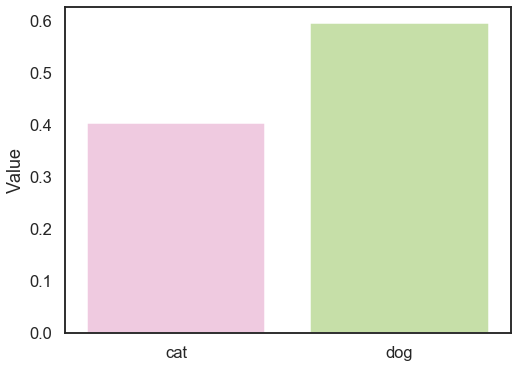


Index 19
[0.39756745 0.6024326 ]
予測：　　dog


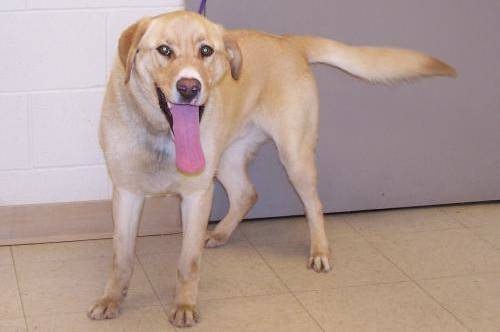

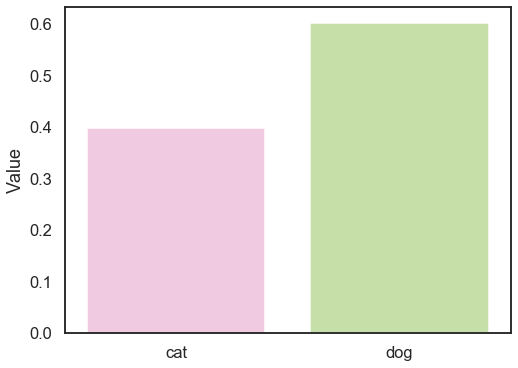


Index 20
[0.42924345 0.57075655]
予測：　　dog


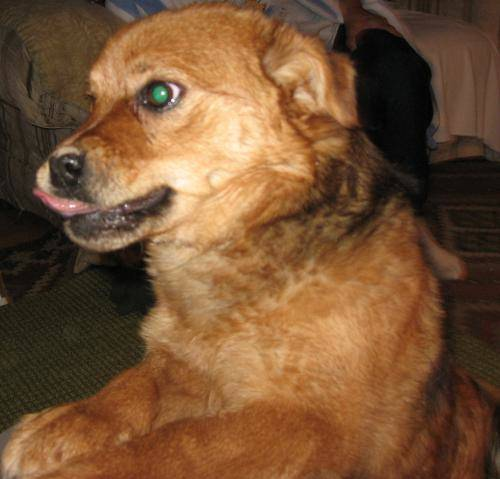

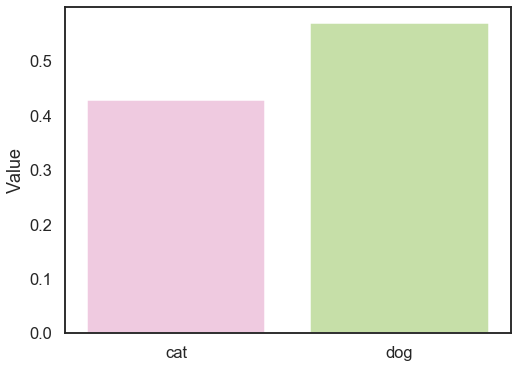

In [4]:
#↓ユーザはここを指定
original_detector.create_model(sgd_lr=0.02, sgd_momentum=0.9, original_model=conv_model, batch_norm = True, dropout = True)
original_detector.get_model_summary()
#↓ユーザはここ（nb_epoch）を指定
original_detector.fit(steps_per_epoch=2000, validation_steps=40, nb_epoch=5)
original_detector.output_history('original_istory.txt')

# ここからは精度向上の為の発展
## 5. 既存の大規模なモデルを使う

In [5]:
#出てくるエラー（W0808とか）は無視してOK
import warnings
warnings.filterwarnings('ignore')
detector = ObjectDetector(train_data_dir = './images/train/cat_or_dog/',validation_data_dir = './images/validation/cat_or_dog/',\
                          result_data_dir = 'results/cat_or_dog/')
#↓ユーザはここを指定
detector.create_model(sgd_lr=0.0008, sgd_momentum=0.9, original_model=None, batch_norm=True, dropout=True)
#original_model=None で既存のモデルを使う事を選択する

ラベル : 
['cat', 'dog']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1179712   
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)               

## 6. Fine-tuningの設定を行う
今回だと、第三者が作ったVGG-16という、1000個の種類の画像を識別するモデルを初期状態として読み込んでいて、そのモデルの中で、どこを学習可能にして、どこを不変にするのかを設定する。Fine-tuningの時は学習率は小さめで良い。

In [6]:
for index in range(15): # 一番上から15番目のレイヤーまで重みを固定する。
    detector.deactivate_layer(index)
detector.get_model_summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

## 7.データセットの定義

In [7]:
#↓ユーザはここを指定
detector.create_datasets(batch_size=32, is_augmenting=True)

Found 1908 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## 8.学習

In [ ]:
#↓ユーザはここを指定
detector.fit(steps_per_epoch=2000, validation_steps=40, nb_epoch=5)

Epoch 1/5
13/62 [=====>........................] - ETA: 3:43:41 - loss: 1.2528 - acc: 0.5072

学習の様子をテキストに出力する。

In [ ]:
detector.output_history('history.txt')

## 補足.モデルの重みを出力する
- detector.dump_model_weights("出力先のパス")
- "hdf5"という形式にする

In [ ]:
detector.dump_model_weights('./models/cat_or_dog/model.hdf5')

- 一度出力した重みは、read_model_weights()を使って利用できる。

In [ ]:
detector.read_model_weights('./models/cat_or_dog/model.hdf5')